<a href="https://colab.research.google.com/github/riddhigarg2605/RBC/blob/main/Elongated_using_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [19]:
import tensorflow

In [20]:
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

In [21]:
IMAGE_SIZE = [224, 224]

In [22]:
!unzip '/content/rbc_augmentedNKT.zip'

Streaming output truncated to the last 5000 lines.
  inflating: rbc_augmentedNKT/training/elongated/Ovalocyte_original_0238MarionsHereditaryElliptocytosis1-Gloria-Kwon4.jpg_c71b1702-045c-413d-adaf-42a379ed73a2.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._Ovalocyte_original_0238MarionsHereditaryElliptocytosis1-Gloria-Kwon4.jpg_c71b1702-045c-413d-adaf-42a379ed73a2.jpg  
  inflating: rbc_augmentedNKT/training/elongated/elong_original_e0034.jpg_13f94a8f-8146-4815-a682-eceb27bc48ba.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._elong_original_e0034.jpg_13f94a8f-8146-4815-a682-eceb27bc48ba.jpg  
  inflating: rbc_augmentedNKT/training/elongated/Ovalocyte_original_602701.jpg_2a3a359d-4755-47ba-bc9f-6c120948be17.jpg  
  inflating: __MACOSX/rbc_augmentedNKT/training/elongated/._Ovalocyte_original_602701.jpg_2a3a359d-4755-47ba-bc9f-6c120948be17.jpg  
  inflating: rbc_augmentedNKT/training/elongated/Elliptocytosis_original_602706.jpg_f0554da8-0f6e-462f-95e0-

In [23]:
train_path = '/content/rbc_augmentedNKT/training'
valid_path = '/content/rbc_augmentedNKT/validation'

In [24]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [25]:
for layer in vgg.layers:
  layer.trainable = False

In [26]:
folders = glob('/content/rbc_augmentedNKT/training/*')

In [27]:
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [28]:
model = Model(inputs=vgg.input, outputs=prediction)

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [30]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [33]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_datagen.flow_from_directory('/content/rbc_augmentedNKT/training',
                                                 target_size = (224, 224),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 3237 images belonging to 3 classes.


In [35]:
test_set = test_datagen.flow_from_directory('/content/rbc_augmentedNKT/validation',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'categorical')

Found 238 images belonging to 3 classes.


In [36]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
324/324 [==============================] - 92s 183ms/step - loss: 0.4529 - accuracy: 0.6639 - val_loss: 0.4256 - val_accuracy: 0.7059
Epoch 2/5
324/324 [==============================] - 53s 164ms/step - loss: 0.3567 - accuracy: 0.7417 - val_loss: 0.3678 - val_accuracy: 0.7479
Epoch 3/5
324/324 [==============================] - 53s 164ms/step - loss: 0.3115 - accuracy: 0.7856 - val_loss: 0.3956 - val_accuracy: 0.7143
Epoch 4/5
324/324 [==============================] - 53s 164ms/step - loss: 0.2912 - accuracy: 0.8060 - val_loss: 0.3184 - val_accuracy: 0.7563
Epoch 5/5
324/324 [==============================] - 53s 164ms/step - loss: 0.2728 - accuracy: 0.8174 - val_loss: 0.3166 - val_accuracy: 0.7479


In [37]:
model.save('elongated_transfer_model.h5')

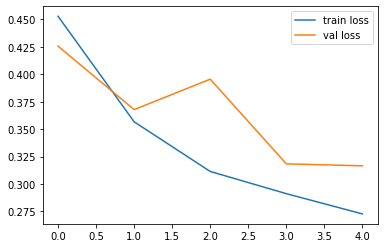

<Figure size 432x288 with 0 Axes>

In [38]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

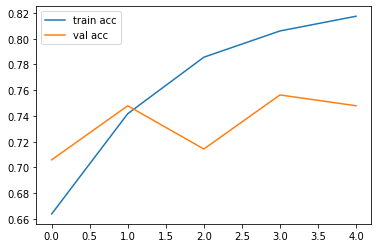

<Figure size 432x288 with 0 Axes>

In [39]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')